In [16]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr

In [69]:
df = pd.read_csv('./csv/refined.csv')

In [72]:
df.shape

(1550252, 22)

In [73]:
team_size = df.gh_team_size.unique()
print(team_size)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


In [74]:
sample_set = 100

In [75]:
src_sloc = np.zeros((sample_set, len(team_size)))
test_sloc = np.zeros((sample_set, len(team_size)))
status_failed = np.zeros((sample_set, len(team_size)))
status_passed = np.zeros((sample_set, len(team_size)))
test_failed = np.zeros((sample_set, len(team_size)))
test_ok = np.zeros((sample_set, len(team_size)))
date = np.zeros((sample_set, len(team_size)))
src_date_res = np.zeros((sample_set, len(team_size)))
test_date_res = np.zeros((sample_set, len(team_size)))

In [ ]:
for i in range(sample_set):
    print(i)
    sample = df.sample(frac=1, replace=True)
    print(sample.shape)
    sample = sample.sort_values('gh_team_size')
    
    for index, threshold in enumerate(team_size):
        if index == 0 or index == len(team_size) - 1:
            continue

        src = sample.groupby('gh_team_size', as_index=False)['git_diff_src_churn'].mean()
        test = sample.groupby('gh_team_size', as_index=False)['git_diff_test_churn'].mean()
        sloc = sample.groupby('gh_team_size', as_index=False)['gh_sloc'].mean()
        counts = sample.groupby(['gh_team_size']).size().reset_index(name='counts')
        failed = sample.groupby(['gh_team_size']).tr_status.value_counts().unstack(fill_value=0).loc[:, 0].tolist()
        passed = sample.groupby(['gh_team_size']).tr_status.value_counts().unstack(fill_value=0).loc[:, 1].tolist()
        failed_tests = df.groupby('gh_team_size', as_index=False)['tr_log_num_tests_failed'].mean()
        ok_tests = sample.groupby('gh_team_size', as_index=False)['tr_log_num_tests_ok'].mean()
        total_tests = sample.groupby('gh_team_size', as_index=False)['tr_log_num_tests_run'].mean()
        date_diff = sample.groupby('gh_team_size', as_index=False)['date_diff'].mean()
        src_date = sample.groupby('gh_team_size', as_index=False)['src_date'].mean()
        test_date = sample.groupby('gh_team_size', as_index=False)['test_date'].mean()
        
        sloc_list = sloc['gh_sloc'].tolist()
        test_list = test['git_diff_test_churn'].tolist()
        src_list = src['git_diff_src_churn'].tolist()
        failed_tests_list = failed_tests['tr_log_num_tests_failed'].tolist()
        total_tests_list = total_tests['tr_log_num_tests_run'].tolist()
        ok_tests_list = ok_tests['tr_log_num_tests_ok'].tolist()
        date_diff_list = date_diff['date_diff'].tolist()
        src_date_list = src_date['src_date'].tolist()
        test_date_list = test_date['test_date'].tolist()
        total_status = list(counts['counts'])

        lower_half_mean_src = np.mean(src_list[:index]) / np.mean(sloc_list[:index])
        upper_half_mean_src = np.mean(src_list[index:]) / np.mean(sloc_list[index:])
        
        lower_half_mean_test = np.mean(test_list[:index]) / np.mean(sloc_list[:index])
        upper_half_mean_test = np.mean(test_list[index:]) / np.mean(sloc_list[index:])
        
        lower_half_mean_failure = np.mean(failed[:index]) / np.mean(total_status[:index])
        upper_half_mean_failure = np.mean(failed[index:]) / np.mean(total_status[index:])

        lower_half_mean_passed = np.mean(passed[:index]) / np.mean(total_status[:index])
        upper_half_mean_passed = np.mean(passed[index:]) / np.mean(total_status[index:])
        
        lower_half_failed_tests = np.mean(failed_tests_list[:index]) / np.mean(total_tests_list[:index])
        upper_half_failed_tests = np.mean(failed_tests_list[index:]) / np.mean(total_tests_list[index:])
        
        lower_half_ok_tests = np.mean(ok_tests_list[:index]) / np.mean(total_tests_list[:index])
        upper_half_ok_tests = np.mean(ok_tests_list[index:]) / np.mean(total_tests_list[index:])
        
        lower_half_date_diff = np.mean(date_diff_list[:index])
        upper_half_date_diff = np.mean(date_diff_list[index:])
        
        lower_half_src_date = np.mean(src_date_list[:index])
        upper_half_src_date = np.mean(src_date_list[index:])
        
        lower_half_test_date = np.mean(test_date_list[:index])
        upper_half_test_date = np.mean(test_date_list[index:])

        src_sloc[i][index] = lower_half_mean_src - upper_half_mean_src
        test_sloc[i][index] = lower_half_mean_test - upper_half_mean_test
        status_failed[i][index] = lower_half_mean_failure - upper_half_mean_failure
        status_passed[i][index] = lower_half_mean_passed - upper_half_mean_passed
        test_failed[i][index] = lower_half_failed_tests - upper_half_failed_tests
        test_ok[i][index] = lower_half_ok_tests - upper_half_ok_tests
        date[i][index] = lower_half_date_diff - upper_half_date_diff
        src_date_res[i][index] = lower_half_src_date - upper_half_src_date
        test_date_res[i][index] = lower_half_test_date - upper_half_test_date

0
(1550252, 22)


C:\Users\norouziy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\norouziy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars


1
(1550252, 22)
2
(1550252, 22)
3
(1550252, 22)
4
(1550252, 22)
5
(1550252, 22)
6
(1550252, 22)
7
(1550252, 22)
8
(1550252, 22)
9
(1550252, 22)
10
(1550252, 22)
11
(1550252, 22)
12
(1550252, 22)
13
(1550252, 22)
14
(1550252, 22)
15
(1550252, 22)
16
(1550252, 22)
17
(1550252, 22)
18
(1550252, 22)
19
(1550252, 22)
20
(1550252, 22)
21
(1550252, 22)
22
(1550252, 22)
23
(1550252, 22)
24
(1550252, 22)
25
(1550252, 22)
26
(1550252, 22)
27
(1550252, 22)
28
(1550252, 22)
29
(1550252, 22)
30
(1550252, 22)


In [23]:
compare_src_sloc = src_sloc > 0
compare_test_sloc = test_sloc > 0
compare_status_failed = status_failed > 0
compare_status_passed = status_passed > 0
compare_test_failed = test_failed > 0
compare_test_ok = test_ok > 0
compare_date_dif = date > 0
compare_src_date = src_date_res > 0
compare_test_date = test_date_res > 0

In [27]:
sum_src_sloc = np.zeros(len(team_size))
sum_test_sloc = np.zeros(len(team_size))
sum_status_failed = np.zeros(len(team_size))
sum_status_passed = np.zeros(len(team_size))
sum_test_failed = np.zeros(len(team_size))
sum_test_ok = np.zeros(len(team_size))
sum_date_diff = np.zeros(len(team_size))
sum_src_date = np.zeros(len(team_size))
sum_test_date = np.zeros(len(team_size))
for i in range(len(team_size)):
    sum_src_sloc[i] = np.sum(compare_src_sloc[:, i])
    sum_test_sloc[i] = np.sum(compare_test_sloc[:, i])
    sum_status_failed[i] = np.sum(compare_status_failed[:, i])
    sum_status_passed[i] = np.sum(compare_status_passed[:, i])
    sum_test_failed[i] = np.sum(compare_test_failed[:, i])
    sum_test_ok[i] = np.sum(compare_test_ok[:, i])
    sum_date_diff[i] = np.sum(compare_date_dif[:, i])
    sum_src_date[i] = np.sum(compare_src_date[:, i])
    sum_test_date[i] = np.sum(compare_test_date[:, i])

In [34]:
mean_threshold = np.zeros(len(team_size))
for i in range(len(team_size)):
    mean_threshold[i] = np.mean(np.array([sum_src_sloc[i], sum_test_sloc[i], sum_status_failed[i], sum_status_passed[i], sum_test_failed[i], sum_test_ok[i], sum_date_diff[i], sum_src_date[i], sum_test_date[i]]))

In [35]:
print(mean_threshold)

[ 0.         44.44444444 55.77777778 55.55555556 58.66666667 68.55555556
 76.77777778 77.77777778 77.77777778 77.77777778 77.77777778 77.66666667
 77.11111111 77.66666667 77.77777778 77.77777778 77.77777778 77.77777778
 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778
 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778
 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778
 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778
 77.77777778 77.77777778 77.77777778 77.77777778 77.77777778 77.66666667
 77.55555556 77.33333333 77.11111111 76.33333333 77.22222222 76.11111111
 72.22222222 68.33333333 68.11111111 67.         77.66666667  0.        ]


In [38]:
selected = np.argmax(mean_threshold)
print(selected)

7


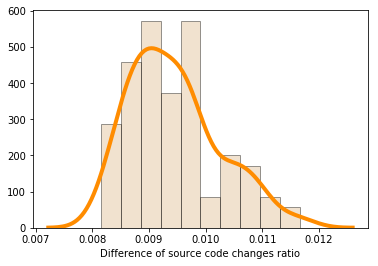

In [71]:
x = pd.Series(src_sloc[:, selected], name="Difference of source code changes ratio")
sns.distplot(x, hist=True, kde=True,
                 bins=10, color='burlywood',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'darkorange'})
plt.savefig('./figs/src_sloc_ratio.eps', format='eps')

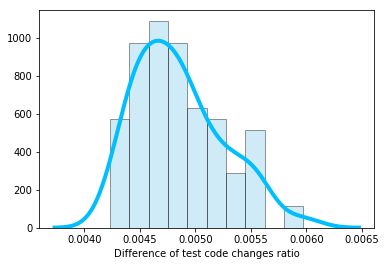

In [64]:
x = pd.Series(test_sloc[:, selected], name="Difference of test code changes ratio")
sns.distplot(x, hist=True, kde=True,
                 bins=10, color='skyblue',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'deepskyblue'})
plt.savefig('./figs/test_sloc_ratio.eps', format='eps')

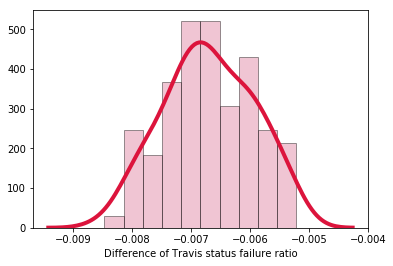

In [63]:
x = pd.Series(status_failed[:, selected], name="Difference of Travis status failure ratio")
sns.distplot(x, hist=True, kde=True,
                 bins=10, color='palevioletred',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'crimson'})
plt.savefig('./figs/status_failed.eps', format='eps')

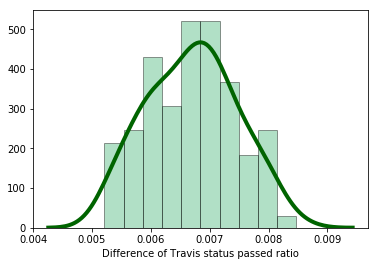

In [66]:
x = pd.Series(status_passed[:, selected], name="Difference of Travis status passed ratio")
sns.distplot(x, hist=True, kde=True,
                 bins=10, color='mediumseagreen',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'darkgreen'})
plt.savefig('./figs/status_passed.eps', format='eps')

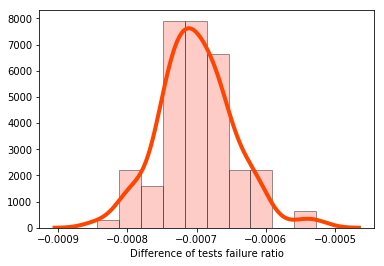

In [68]:
x = pd.Series(test_failed[:, selected], name="Difference of tests failure ratio")
sns.distplot(x, hist=True, kde=True,
                 bins=10, color='salmon',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'orangered'})
plt.savefig('./figs/test_failed_ratio.eps', format='eps')

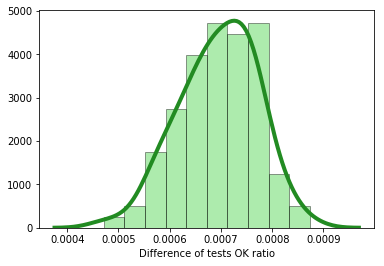

In [59]:
x = pd.Series(test_ok[:, selected], name="Difference of tests OK ratio")
sns.distplot(x, hist=True, kde=True,
                 bins=10, color='limegreen',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'forestgreen'})
plt.savefig('./figs/test_ok_ratio.eps', format='eps')

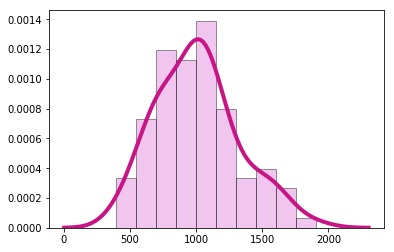

In [58]:
sns.distplot(date[:, selected], hist=True, kde=True,
                 bins=10, color='orchid',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'mediumvioletred'})
plt.savefig('./figs/date.eps', format='eps')

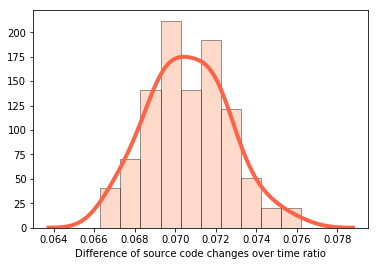

In [67]:
x = pd.Series(src_date_res[:, selected], name="Difference of source code changes over time ratio")
sns.distplot(x, hist=True, kde=True,
                 bins=10, color='lightsalmon',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'tomato'})
plt.savefig('./figs/src_date_ratio.eps', format='eps')

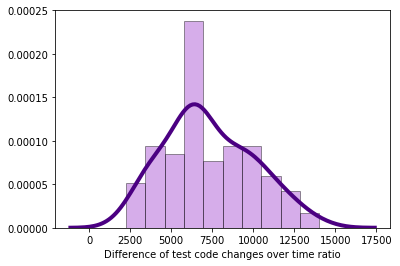

In [54]:
x = pd.Series(test_date_res[:, selected], name="Difference of test code changes over time ratio")
sns.distplot(x, hist=True, kde=True,
                 bins=10, color='darkorchid',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4, 'color': 'indigo'})
plt.savefig('./figs/test_date_ratio.eps', format='eps')

In [170]:
pearsonr(df['gh_team_size'], df['date_diff'])

(nan, 1.0)

In [73]:
df.dtypes

Unnamed: 0                           int64
gh_project_name                     object
gh_pr_created_at                    object
gh_lang                             object
gh_num_commits_in_push             float64
gh_first_commit_created_at          object
gh_team_size                         int64
git_num_all_built_commits            int64
gh_num_issue_comments              float64
gh_num_commit_comments               int64
gh_num_pr_comments                 float64
git_diff_src_churn                   int64
git_diff_test_churn                  int64
gh_diff_files_added                  int64
gh_diff_files_deleted                int64
gh_diff_files_modified               int64
gh_diff_tests_added                  int64
gh_diff_tests_deleted                int64
gh_diff_src_files                    int64
gh_diff_doc_files                    int64
gh_diff_other_files                  int64
gh_num_commits_on_files_touched      int64
gh_sloc                              int64
gh_test_lin

In [134]:
stats.ks_2samp(df['gh_team_size'], df['date_diff'])

Ks_2sampResult(statistic=0.5449814527343254, pvalue=0.0)

In [135]:
stats.ks_2samp(df['gh_team_size'], df['src_date'])

Ks_2sampResult(statistic=0.7823774654253031, pvalue=0.0)

In [136]:
stats.ks_2samp(df['gh_team_size'], df['test_date'])

Ks_2sampResult(statistic=0.7854523054719891, pvalue=0.0)

In [137]:
stats.ks_2samp(df['gh_team_size'], df['test_diff_ratio'])

Ks_2sampResult(statistic=0.9963149427146931, pvalue=0.0)

In [138]:
stats.ks_2samp(df['gh_team_size'], df['src_diff_ratio'])

Ks_2sampResult(statistic=0.9945626145160441, pvalue=0.0)

In [139]:
stats.ttest_ind(df['gh_team_size'], df['tr_status'])

Ttest_indResult(statistic=1918.6247274678876, pvalue=0.0)

In [140]:
stats.ks_2samp(df['gh_team_size'], df['tr_log_num_tests_failed'])

Ks_2sampResult(statistic=0.5118695438361318, pvalue=0.0)

In [142]:
stats.ks_2samp(df['gh_team_size'], df['tr_log_num_tests_ok'])

Ks_2sampResult(statistic=0.8697261630079312, pvalue=0.0)

In [141]:
stats.ks_2samp(df['gh_team_size'], df['tr_log_num_tests_run'])

Ks_2sampResult(statistic=0.906424903796893, pvalue=0.0)

In [8]:
sample = df.sample(frac=0.7)

In [9]:
src = sample.groupby('gh_team_size', as_index=False)['git_diff_src_churn'].mean()
test = sample.groupby('gh_team_size', as_index=False)['git_diff_test_churn'].mean()
t_sloc = sample.groupby('gh_team_size', as_index=False)['gh_test_lines_per_kloc'].mean()
sloc = sample.groupby('gh_team_size', as_index=False)['gh_sloc'].mean()
sloc_list = np.array(sloc['gh_sloc'].tolist(), dtype=np.float)
t_sloc_list = np.array(t_sloc['gh_test_lines_per_kloc'].tolist(), dtype=np.float)
test_list = np.array(test['git_diff_test_churn'].tolist(), dtype=np.float)
src_list = np.array(src['git_diff_src_churn'].tolist(), dtype=np.float)

In [10]:
# this means there is a correlation between team size and changes of source code ratio
# pearsonr(team_size, ss)
stats.spearmanr(team_size, src_list / sloc_list)

SpearmanrResult(correlation=-0.7226451792164492, pvalue=7.091676106167226e-11)

In [11]:
stats.mannwhitneyu(team_size, src_list / sloc_list)

MannwhitneyuResult(statistic=60.0, pvalue=3.424736600788257e-20)

In [12]:
# this means there is a correlation between team size and changes of test code ratio
# pearsonr(team_size, ts)
stats.spearmanr(team_size, test_list / t_sloc_list * sloc_list)

SpearmanrResult(correlation=0.6447346485134761, pvalue=2.704766543330544e-08)

In [13]:
stats.mannwhitneyu(team_size, test_list / t_sloc_list * sloc_list)

MannwhitneyuResult(statistic=0.0, pvalue=1.7782854874923613e-21)

In [200]:
# Travis status
counts = sample.groupby(['gh_team_size']).size().reset_index(name='counts')
failed = np.array(sample.groupby(['gh_team_size']).tr_status.value_counts().unstack(fill_value=0).loc[:, 0].tolist(), dtype=np.float)
passed = np.array(sample.groupby(['gh_team_size']).tr_status.value_counts().unstack(fill_value=0).loc[:, 1].tolist(), dtype=np.float)

total_status = np.array(list(counts['counts']), dtype=np.float)
stats.spearmanr(team_size, passed / total_status)

SpearmanrResult(correlation=-0.43517643789941657, pvalue=0.0005111201972021636)

In [192]:
stats.spearmanr(team_size, failed / total_status)

SpearmanrResult(correlation=0.43517643789941657, pvalue=0.0005111201972021636)

In [14]:
# tests
failed_tests = sample.groupby('gh_team_size', as_index=False)['tr_log_num_tests_failed'].mean()
ok_tests = sample.groupby('gh_team_size', as_index=False)['tr_log_num_tests_ok'].mean()
total_tests = sample.groupby('gh_team_size', as_index=False)['tr_log_num_tests_run'].mean()

failed_tests_list = np.array(failed_tests['tr_log_num_tests_failed'].tolist(), dtype=np.float)
total_tests_list = np.array(total_tests['tr_log_num_tests_run'].tolist(), dtype=np.float)
ok_tests_list = np.array(ok_tests['tr_log_num_tests_ok'].tolist(), dtype=np.float)
stats.spearmanr(team_size, failed_tests_list / total_tests_list)

SpearmanrResult(correlation=-0.34654070575159773, pvalue=0.006679139501587907)

In [15]:
stats.spearmanr(team_size, ok_tests_list / total_tests_list)

SpearmanrResult(correlation=0.002445123645457072, pvalue=0.9852069139288007)

In [195]:
# date
date_diff = sample.groupby('gh_team_size', as_index=False)['date_diff'].mean()
src_date = sample.groupby('gh_team_size', as_index=False)['src_date'].mean()
test_date = sample.groupby('gh_team_size', as_index=False)['test_date'].mean()

date_diff_list = np.array(date_diff['date_diff'].tolist(), dtype=np.float)
src_date_list = np.array(src_date['src_date'].tolist(), dtype=np.float)
test_date_list = np.array(test_date['test_date'].tolist(), dtype=np.float)

stats.spearmanr(team_size, date_diff_list)

SpearmanrResult(correlation=-0.4230063906640734, pvalue=0.0007592467266302635)

In [196]:
stats.spearmanr(team_size, test_date_list)

SpearmanrResult(correlation=-0.8230063906640736, pvalue=7.131715052026028e-16)

In [197]:
stats.spearmanr(team_size, src_date_list)

SpearmanrResult(correlation=-0.7205334815226453, pvalue=8.551127482448382e-11)